# 1. Загружаю данные

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
# Загрузка CSV файла в DataFrame
df = pd.read_csv('forFBpost.csv', sep=';', encoding='utf-8')

# 2. Проверяю правильность их отображения

In [99]:
# Проверка правильности загрузки csv файла
df

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,15400.0,15100.0,15700.0
1,Белокуриха,2001,NaN,15400.0,15100.0,15700.0
2,Белокуриха,2002,NaN,15400.0,15000.0,15700.0
3,Белокуриха,2003,NaN,15300.0,15000.0,15700.0
4,Белокуриха,2004,NaN,15300.0,14900.0,15600.0
...,...,...,...,...,...,...
30245,Облучье,2116,NaN,300.0,100.0,800.0
30246,Облучье,2117,NaN,300.0,100.0,800.0
30247,Облучье,2118,NaN,300.0,100.0,800.0
30248,Облучье,2119,NaN,300.0,100.0,800.0


# Данные отображаются корректно. Приступим к анализу

Проверка на наличие пропущенных значений

In [100]:
df.isnull().sum()

Город                  0
year                   0
fact               27000
Модель                 0
Нижняя граница         0
Верхняя граница        0
dtype: int64

Проверим насколько хорошо модель апроксимирует обучающую выборку. Для этого отобразим фактические данные и спрогнозированные

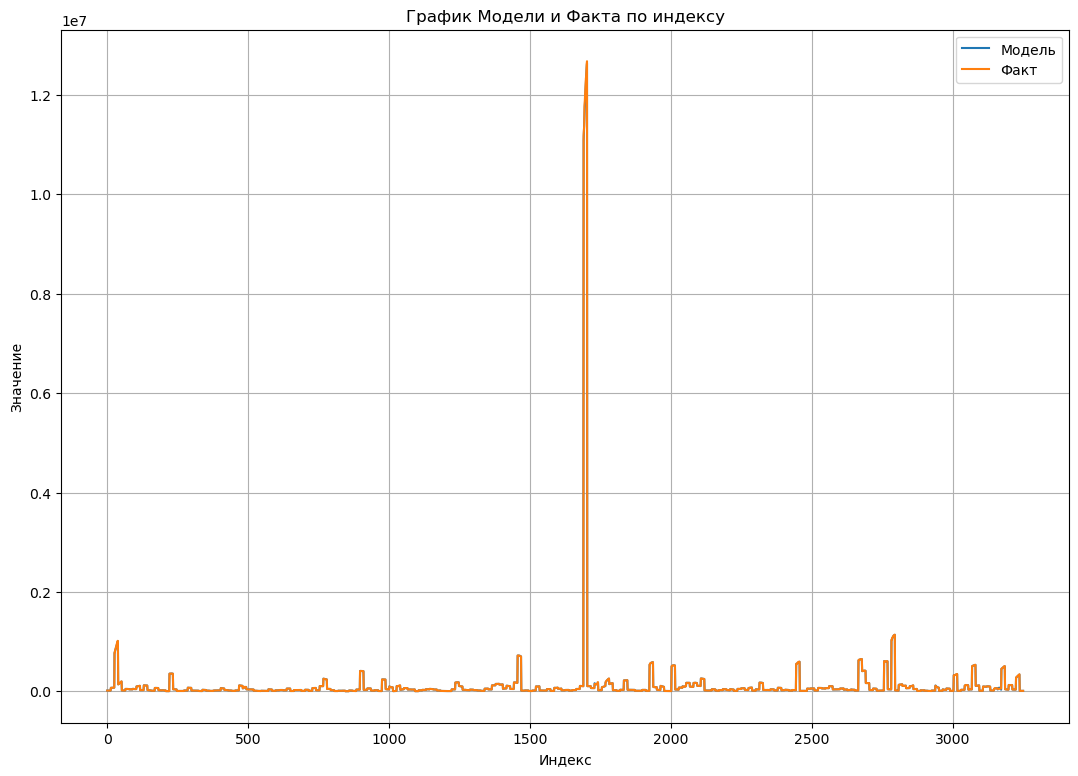

In [101]:
filtered_data = df[df['fact'].notnull()]
filtered_data.reset_index(drop=True, inplace=True)

plt.figure(figsize=(13, 9))

plt.plot(filtered_data.index, filtered_data['Модель'], label='Модель')
plt.plot(filtered_data.index, filtered_data['fact'], label='Факт')

plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('График Модели и Факта по индексу')

plt.legend()
plt.grid(True)
plt.show()

Так как на большом количестве данных достаточно сложно увидеть несовпадения отображаю выбранный случайно промежуток значений

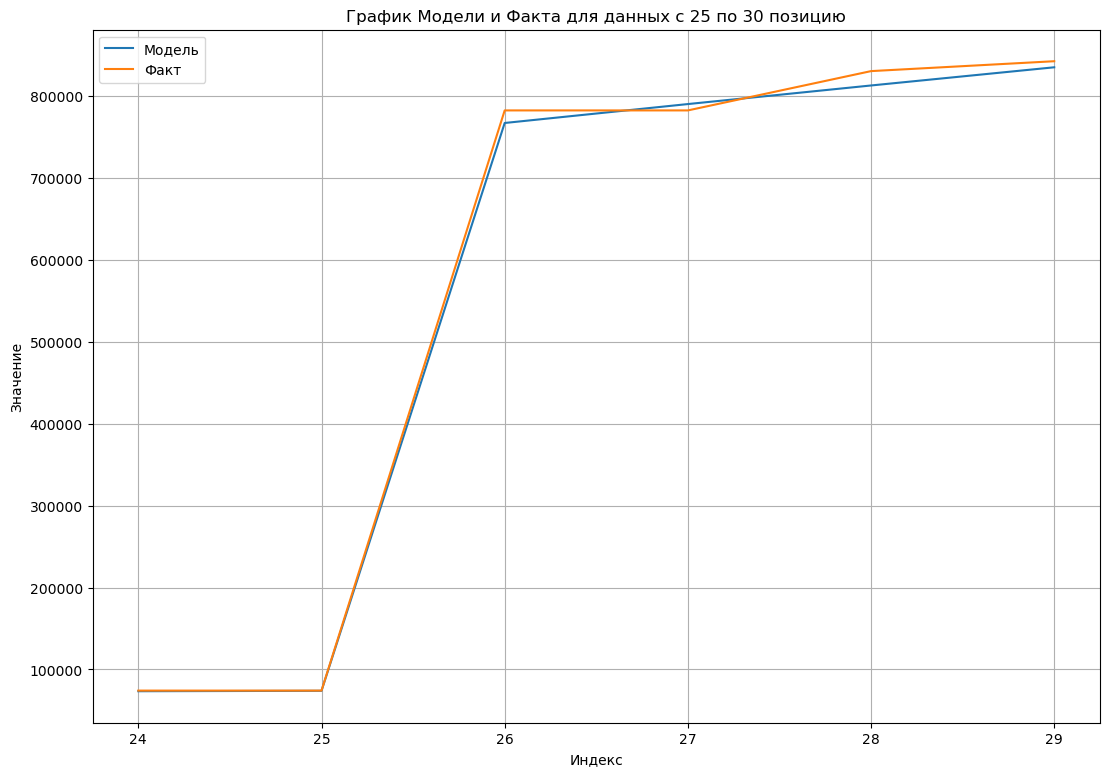

In [102]:
plt.figure(figsize=(13, 9)) 

start_index = 24
end_index = 30

plt.plot(filtered_data.index[start_index:end_index ], filtered_data['Модель'].iloc[start_index:end_index], label='Модель')
plt.plot(filtered_data.index[start_index:end_index ], filtered_data['fact'].iloc[start_index:end_index], label='Факт')

plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.title('График Модели и Факта для данных с 25 по 30 позицию')

plt.legend()
plt.grid(True)
plt.show()

Мы можем наблюдать, что модель достаточно точно описывает данные и мы можем их использовать

# Модель хорошо апроксимирует обучающие данные, значит могу использовать новый датафрейм без NaN значений, верхней и нижней границ, колонки fact.

In [103]:
new_df = df[['Город', 'year', 'Модель']]
new_df

,Город,year,Модель
0,Белокуриха,2000,15400.0
1,Белокуриха,2001,15400.0
2,Белокуриха,2002,15400.0
3,Белокуриха,2003,15300.0
4,Белокуриха,2004,15300.0
...,...,...,...
30245,Облучье,2116,300.0
30246,Облучье,2117,300.0
30247,Облучье,2118,300.0
30248,Облучье,2119,300.0


Описательная статистика

In [104]:
new_df.describe()

,year,Модель
count,30250.000000,3.025000e+04
mean,2060.000000,1.402168e+05
std,34.929076,8.866193e+05
min,2000.000000,0.000000e+00
25%,2030.000000,1.170000e+04
50%,2060.000000,2.790000e+04
75%,2090.000000,7.410000e+04
max,2120.000000,1.541940e+07


Визуализируем динамику роста населения в разных городах

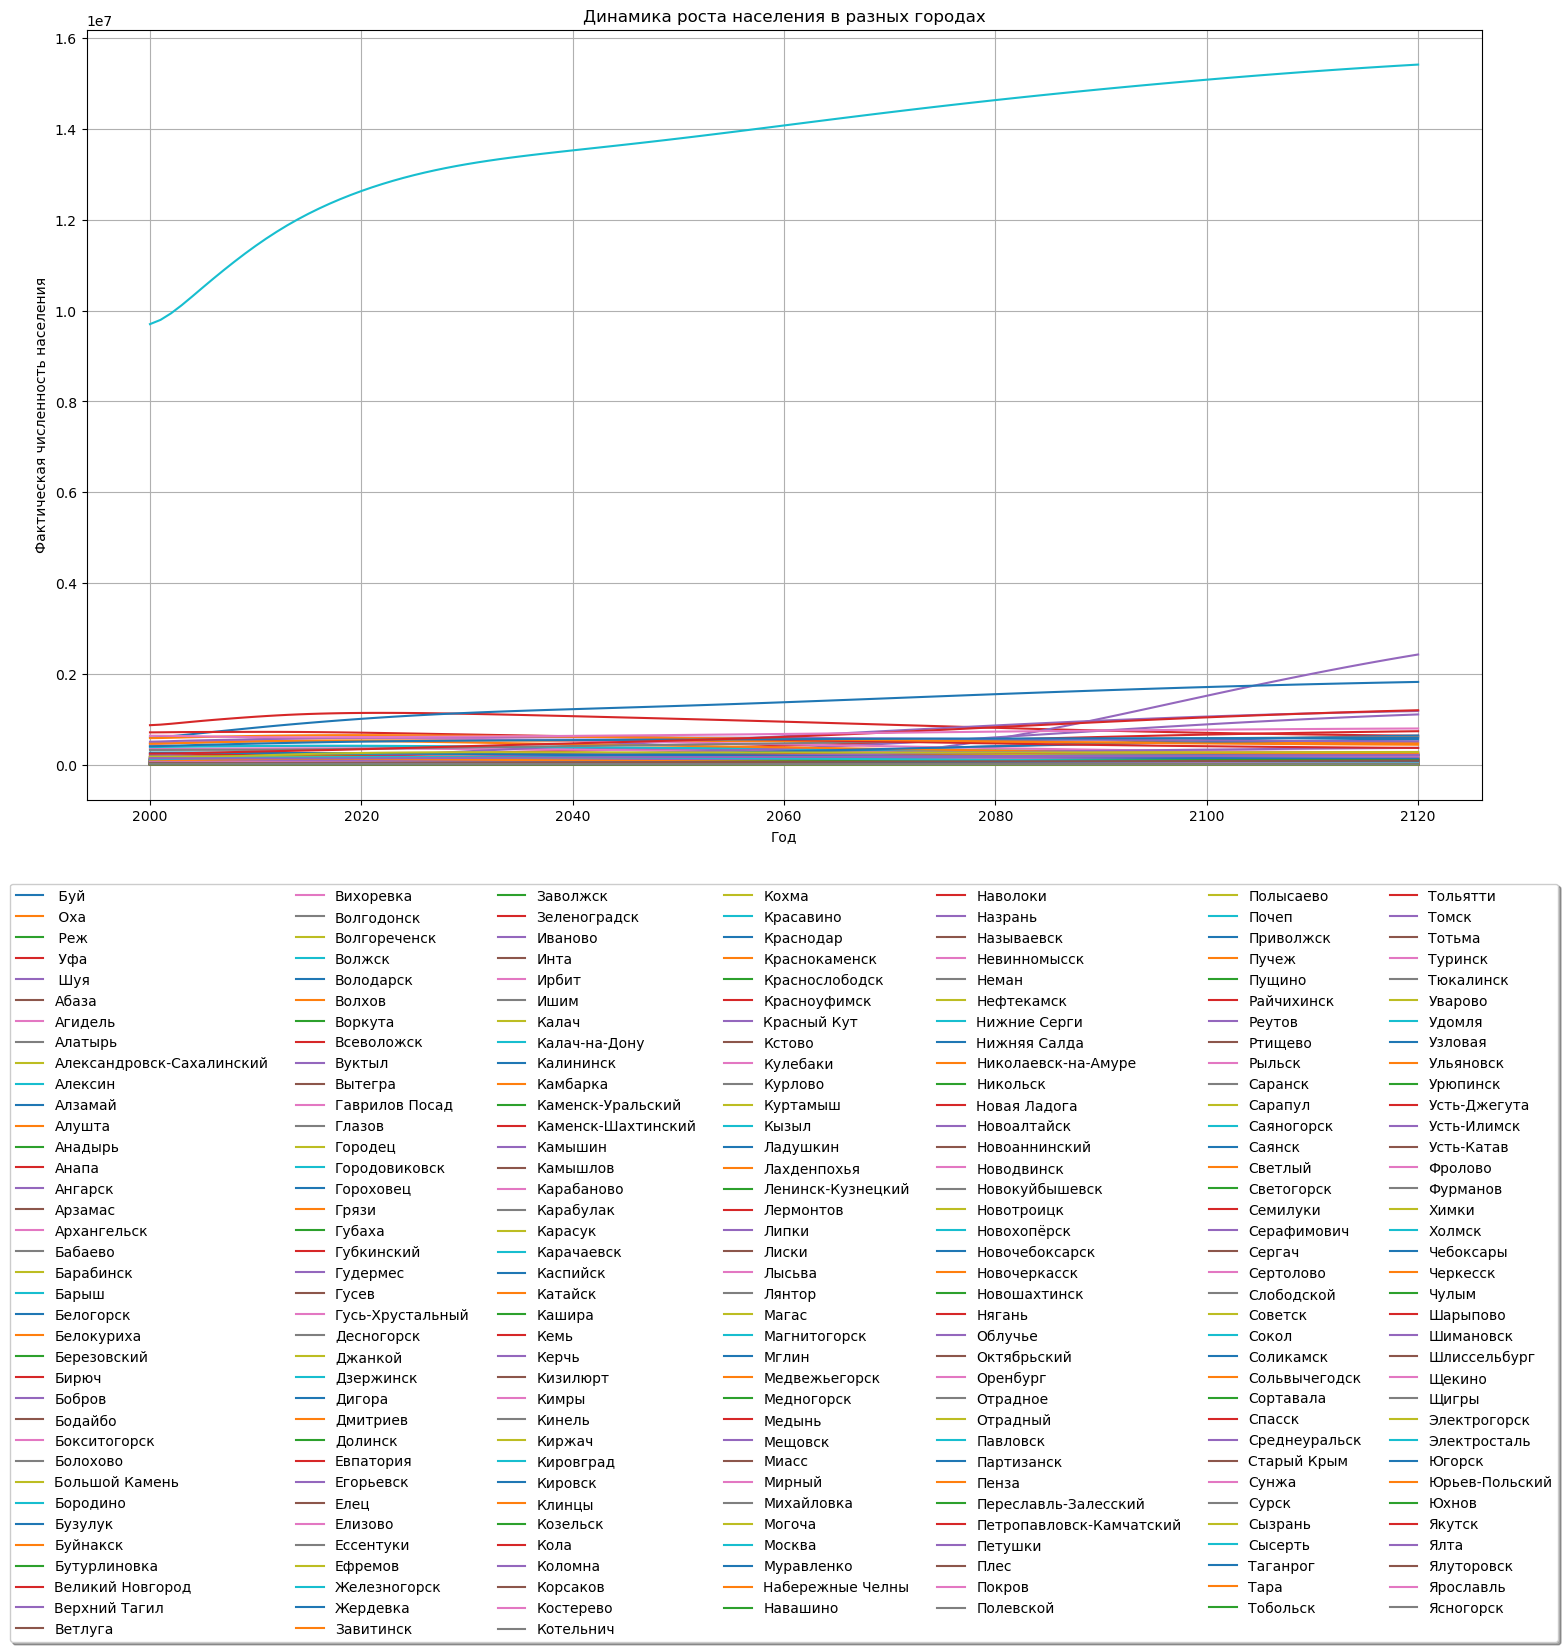

In [105]:
# Группировка данных по городам для сравнения динамики роста
grouped = new_df.groupby('Город')

# Визуализация динамики роста в разных городах
plt.figure(figsize=(18, 10))

for city, data in grouped:
    plt.plot(data['year'], data['Модель'], label=city)

plt.xlabel('Год')
plt.ylabel('Фактическая численность населения')
plt.title('Динамика роста населения в разных городах')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=7)
plt.grid(True)
plt.show()

Посчитаем процентное изменение численности населения относительно 2000 года

In [107]:
new_df.loc[:, 'percent'] = ((df['Модель'] - df.loc[df['year'] == 2000, 'Модель'].values[0]) / df.loc[df['year'] == 2000, 'Модель'].values[0]) * 100

Отсортируем данные в порядке убывания и выведем 10 лидеров

In [108]:
leaders_df = new_df[new_df['year'] == 2024].sort_values(by='percent', ascending=False).head(10)
leaders_df.reset_index(drop=True, inplace=True)
leaders_df

,Город,year,Модель,percent
0,Москва,2024,12924500.0,83825.324675
1,Уфа,2024,1137100.0,7283.766234
2,Краснодар,2024,1067700.0,6833.116883
3,Тольятти,2024,687400.0,4363.636364
4,Ульяновск,2024,645600.0,4092.207792
5,Ярославль,2024,609600.0,3858.441558
6,Томск,2024,600300.0,3798.051948
7,Оренбург,2024,582100.0,3679.870130
8,Набережные Челны,2024,533900.0,3366.883117
9,Чебоксары,2024,516600.0,3254.545455


Визуализируем полученные данные

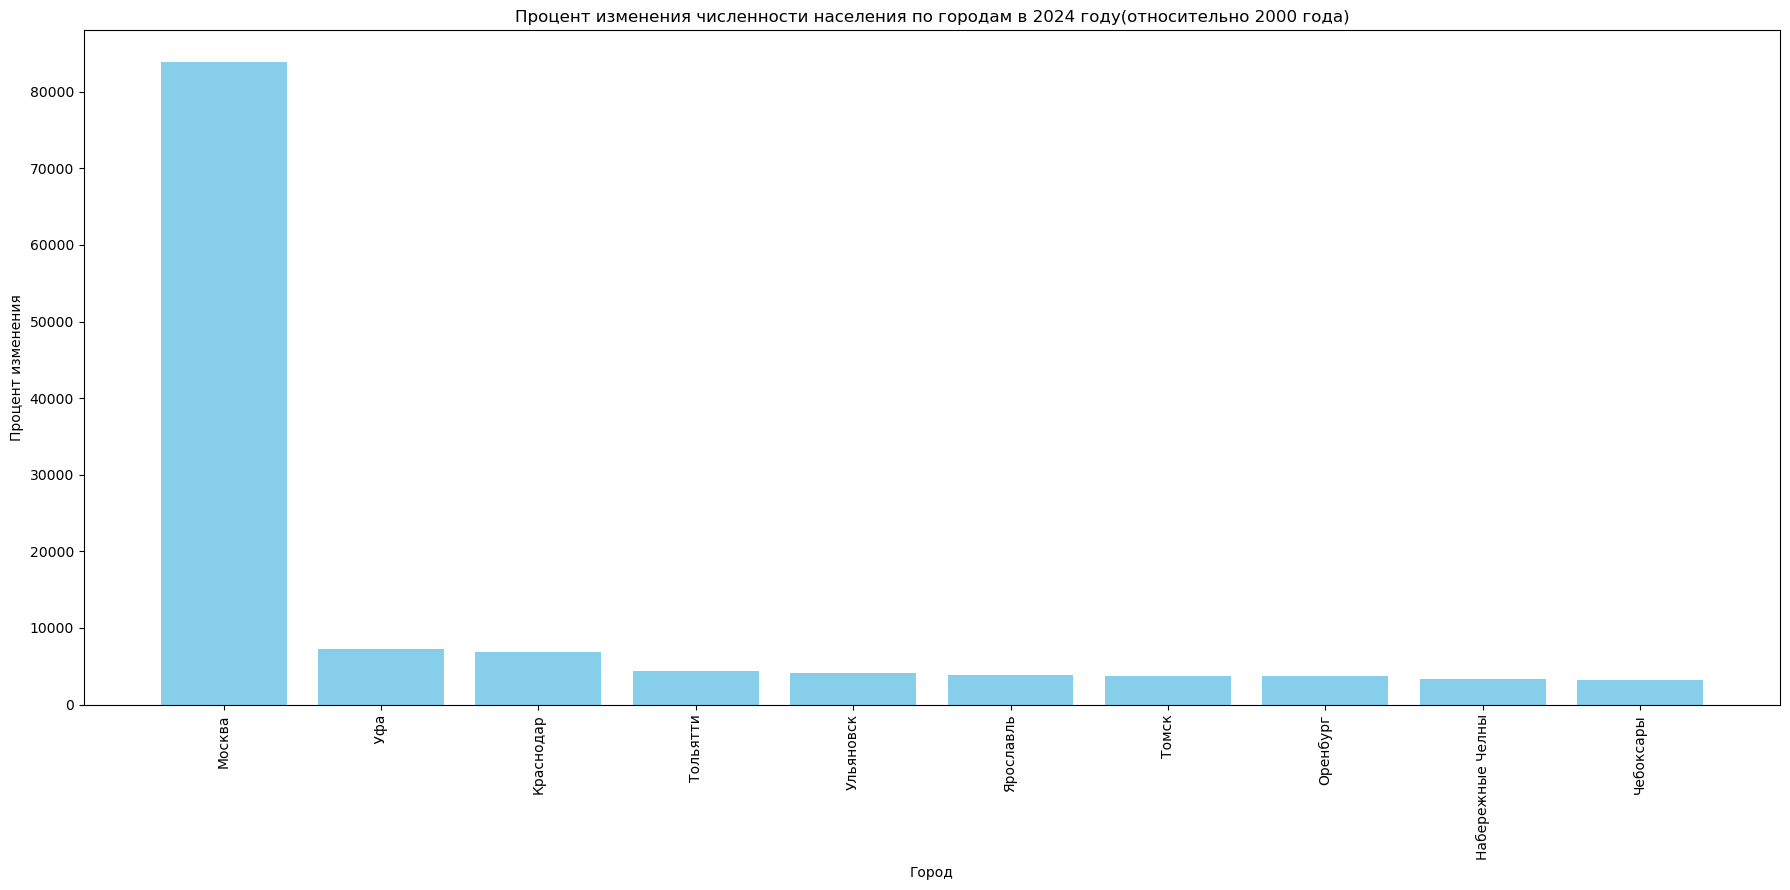

In [109]:
plt.figure(figsize=(18, 9))
plt.bar(leaders_df['Город'], leaders_df['percent'], color='skyblue')
plt.xlabel('Город')
plt.ylabel('Процент изменения')
plt.title('Процент изменения численности населения по городам в 2024 году(относительно 2000 года)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Можем заметить, что Москва является абсолютным лидером по росту населения

# Выводы и гипотезы
Хотелось бы отметить, что в ходе анализа я выявил тенденции изменения численности населения по годам и по городам, что может быть ключевым аспектом при выработке планов развития и управления ресурсами. Анализ численности населения позволяет строить прогнозы о будущем развитии городов, что может быть важно для планирования городской инфраструктуры, обеспечения жильем, услугами и т.д. Понимание изменений в численности населения может помочь городским органам и управленцам определить основные потребности жителей и разработать стратегии управления городскими ресурсами. 

Также я выявил 10 городов-лидеров в росте населения. Эти данные могут пригодиться коммерческой компании для принятия решения об открытии нового филиала.